In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("C:/Users/Dell/Downloads/bank-full.csv", sep=';')

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data.shape

(45211, 17)

In [9]:
data.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

<AxesSubplot:xlabel='y', ylabel='count'>

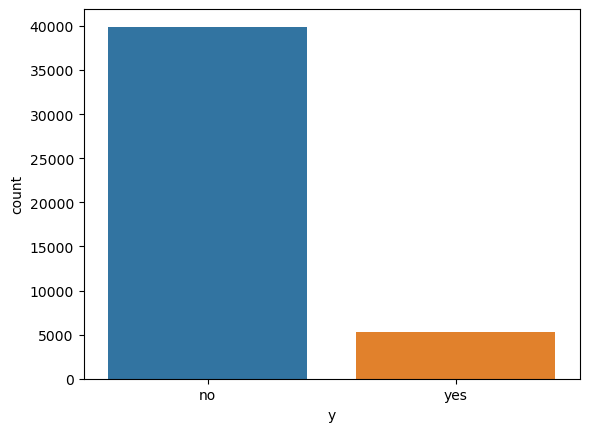

In [10]:
sns.countplot(data=data, x='y')

In [11]:
num_columns = [col for col in data.columns if data[col].dtype!='object']
num_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Text(0.5, 1.0, 'Correlation Matrix')

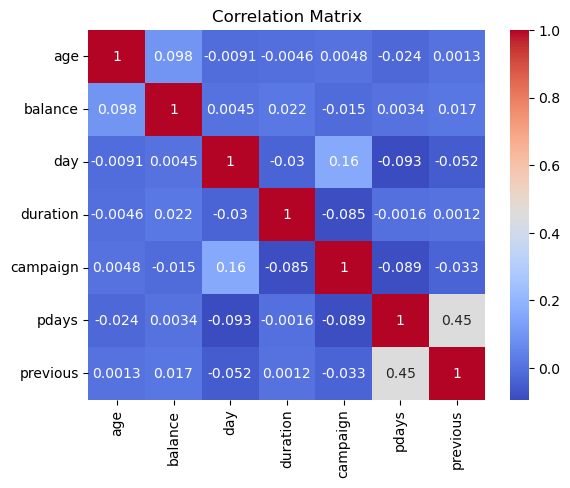

In [12]:
corr = data[num_columns].corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Box plot of duration by target variable')

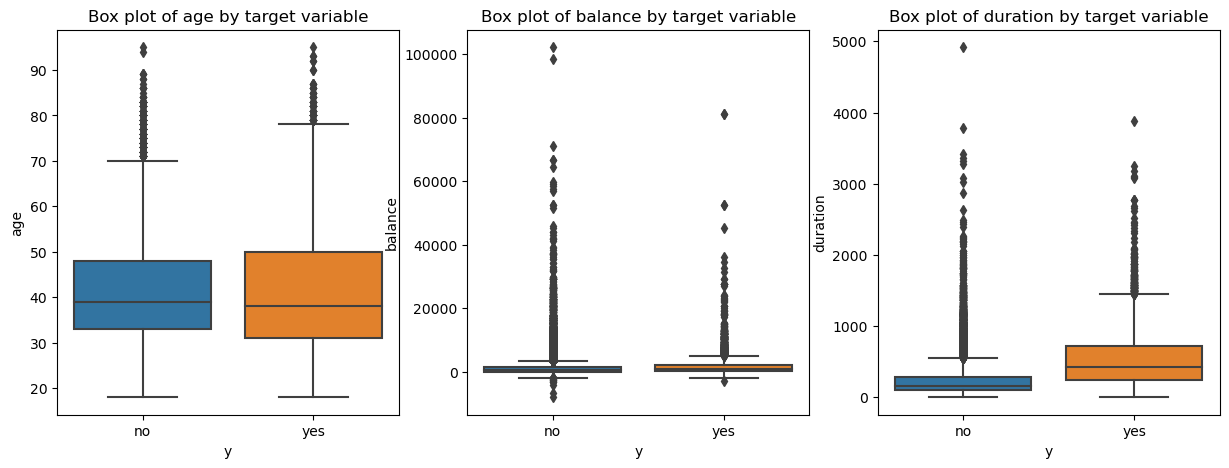

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="y", y="age", data=data)
plt.title("Box plot of age by target variable")
plt.subplot(1,3,2)
sns.boxplot(x="y", y="balance", data=data)
plt.title("Box plot of balance by target variable")
plt.subplot(1,3,3)
sns.boxplot(x="y", y="duration", data=data)
plt.title("Box plot of duration by target variable")

In [15]:
cat_columns = [col for col in data.columns if data[col].dtype=='object']
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

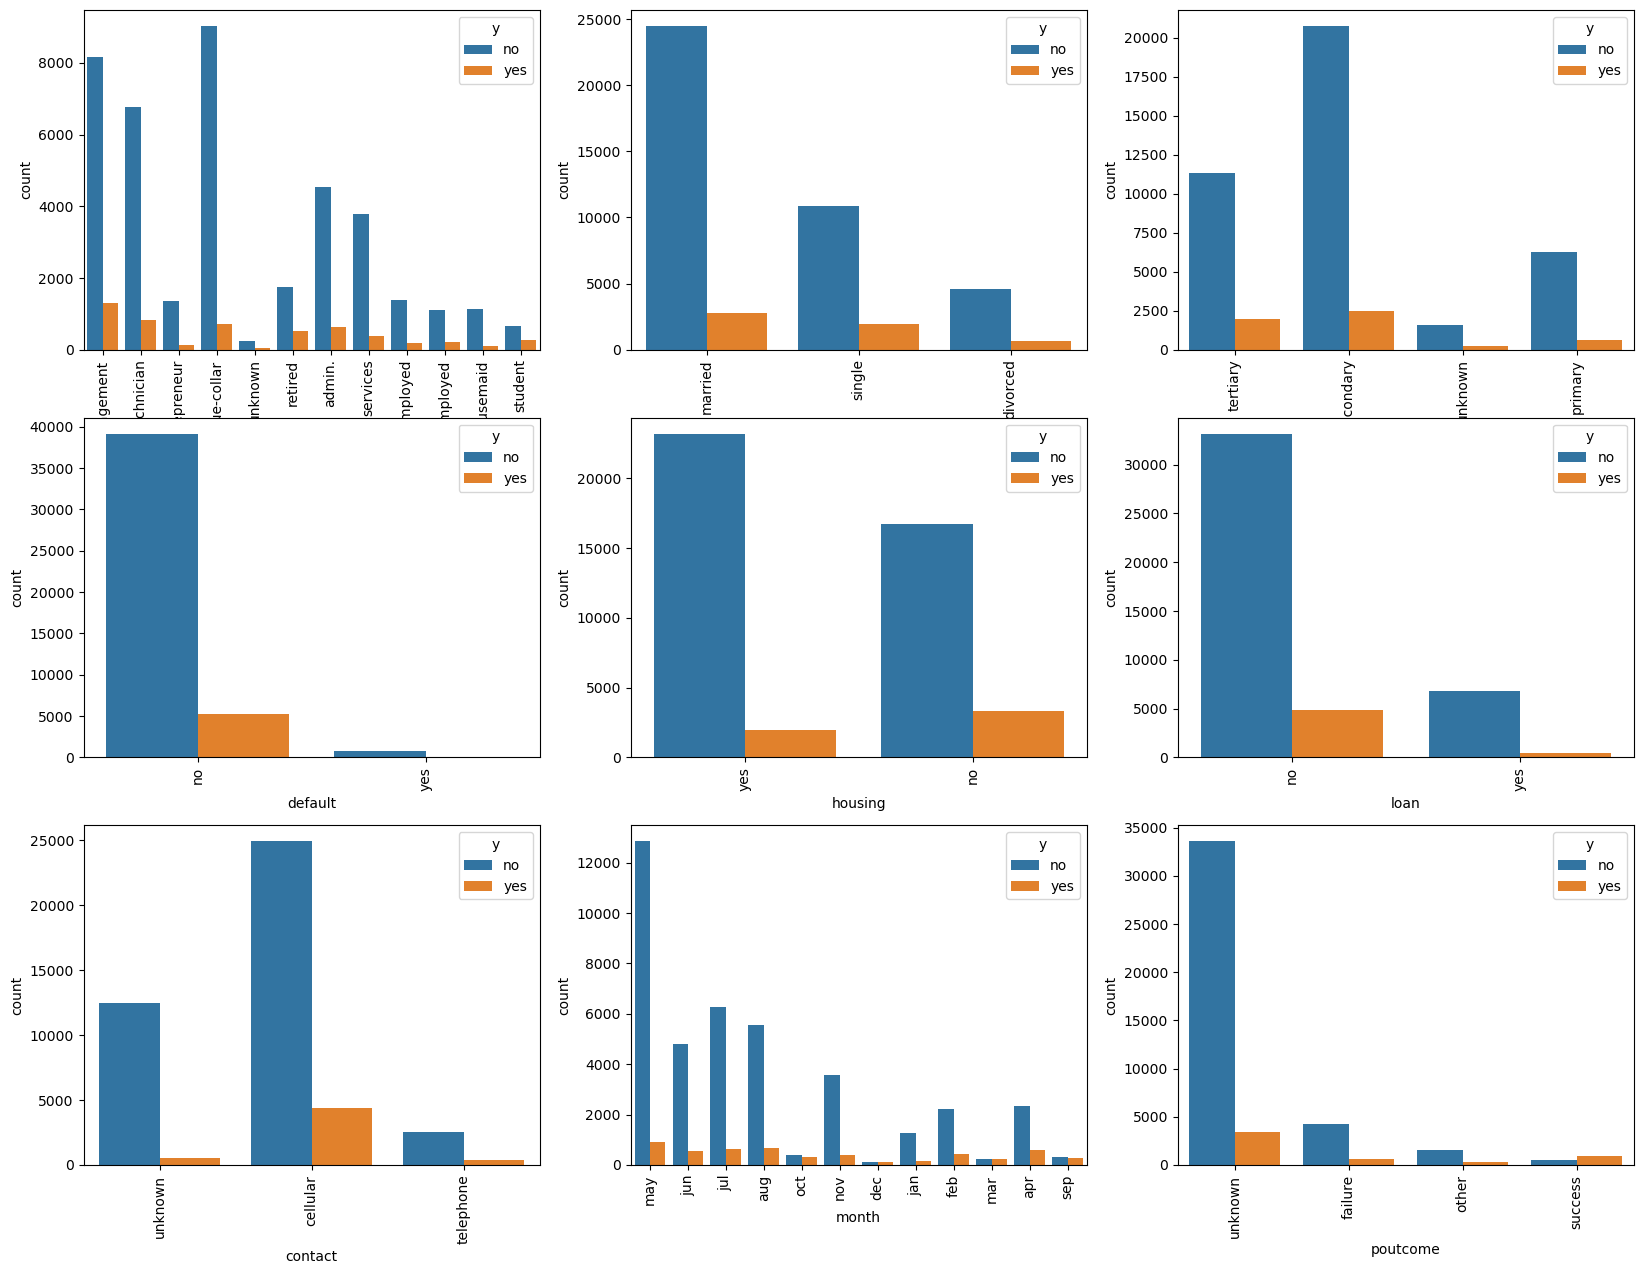

In [16]:
plt.figure(figsize=(20,15))
for i in range(len(cat_columns)-1):
    plt.subplot(3,3,i+1)
    sns.countplot(data=data, x=cat_columns[i], hue='y')
    plt.xticks(rotation=90)

In [17]:
newdata = pd.get_dummies(data, columns=cat_columns, drop_first=True)

In [18]:
newdata

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
newdata.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
x = newdata.drop('y_yes', axis=1) 
y = newdata['y_yes']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [24]:
x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,-0.523740,5.422561,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,1.909346,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,5.377848,-2.116316
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,1.909346,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519


In [25]:
classifier = LogisticRegression(max_iter=3000)
classifier.fit(x,y)

LogisticRegression(max_iter=3000)

In [26]:
y_pred = classifier.predict(x)

In [27]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[38941   981]
 [ 3457  1832]]


In [29]:
# accuracy
confusion_matrix.trace()/sum([sum(row) for row in confusion_matrix])

0.901838048262591

we found 90% accuracy

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y, y_pred)
auc

0.6609031802788741

Text(0, 0.5, 'True positive rate')

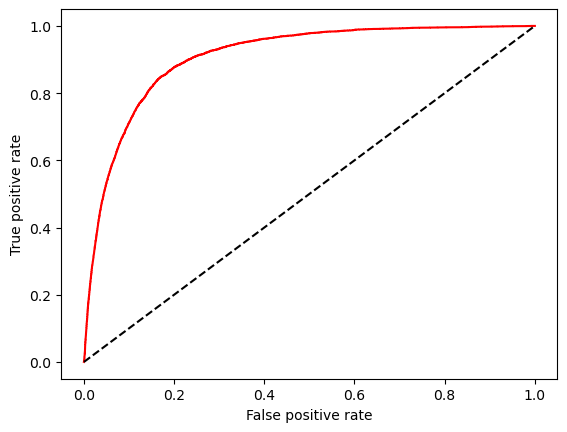

In [31]:
plt.plot(fpr, tpr,color='red')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')